# JSON

A way to store data (lists, dictionaries, etc) in a string or file format. An example and exercise is below.

In [26]:
import json

json_example = r'''
{
  "url": "https://twitter.com/ChicagoPython/status/1309180179537952771",
  "date": "2020-09-24T17:17:32+00:00",
  "content": "Get off Twitter!! Join the Chicago Python Livestream on MLOps!\n\n#Python  #MLOps #DataOps #PythonLunchBreak #ChiPy #100DaysOfCode #100DaysOfMLCode \n\nhttps://t.co/7EKjBEvsc0",
  "renderedContent": "Get off Twitter!! Join the Chicago Python Livestream on MLOps!\n\n#Python  #MLOps #DataOps #PythonLunchBreak #ChiPy #100DaysOfCode #100DaysOfMLCode \n\nyoutube.com/watch?v=uClvvl…",
  "id": 1309180179537952800,
  "username": "ChicagoPython",
  "user": {
    "username": "ChicagoPython",
    "displayname": "ChiPy",
    "id": 4145734157,
    "description": "The Chicago Python User Group loves you! 🐿\n\nYouTube: bit.ly/chipy-tube\nUpcoming events: meetup.com/_ChiPy_/",
    "rawDescription": "The Chicago Python User Group loves you! 🐿\n\nYouTube: https://t.co/WzOFvxLloJ\nUpcoming events: https://t.co/qDHRHyxbGW",
    "descriptionUrls": [
      {
        "text": "bit.ly/chipy-tube",
        "url": "http://bit.ly/chipy-tube",
        "tcourl": "https://t.co/WzOFvxLloJ",
        "indices": [
          53,
          76
        ]
      },
      {
        "text": "meetup.com/_ChiPy_/",
        "url": "http://meetup.com/_ChiPy_/",
        "tcourl": "https://t.co/qDHRHyxbGW",
        "indices": [
          94,
          117
        ]
      }
    ],
    "verified": false,
    "created": "2015-11-09T01:26:26+00:00",
    "followersCount": 1467,
    "friendsCount": 1139,
    "statusesCount": 1325,
    "favouritesCount": 634,
    "listedCount": 33,
    "mediaCount": 304,
    "location": "Chicago, IL",
    "protected": false,
    "linkUrl": "http://www.chipy.org",
    "linkTcourl": "https://t.co/PRcBbqRkpO",
    "profileImageUrl": "https://pbs.twimg.com/profile_images/663559306965454848/aBTV9K8l_normal.png",
    "profileBannerUrl": "https://pbs.twimg.com/profile_banners/4145734157/1447037423"
  },
  "outlinks": [
    "https://www.youtube.com/watch?v=uClvvlfJxqo"
  ],
  "outlinksss": "https://www.youtube.com/watch?v=uClvvlfJxqo",
  "tcooutlinks": [
    "https://t.co/7EKjBEvsc0"
  ],
  "tcooutlinksss": "https://t.co/7EKjBEvsc0",
  "replyCount": 0,
  "retweetCount": 3,
  "likeCount": 1,
  "quoteCount": 0,
  "conversationId": 1309180179537952800,
  "lang": "en",
  "source": "<a href=\"https://mobile.twitter.com\" rel=\"nofollow\">Twitter Web App</a>",
  "media": null,
  "retweetedTweet": null,
  "quotedTweet": null,
  "mentionedUsers": null
}
'''

## Exercise 1

In [27]:
# Load the JSON example above (don't forget to run the cell) using
# the json.loads() function
# Remember, this will turn the json into a python dictionary

#print(json.loads(json_example))
# Print how many times the tweet was retweeted ("retweetCount")

json_parsed = json.loads(json_example)
print(json_parsed['retweetCount'])

# Print the link to the meetup from the tweet information
# INSERT CODE HERE

3


## Exercise 2

Write a function that takes the example JSON string above and returns the retweet count

In [140]:
# Write your function here
def get_retweet_count(item):
    tweet = json.loads(item)
    return tweet['retweet_count']

print(get_retweet_count(json_example))

3


# Saving and Loading JSON to a file

Many times it's not convenient to keep on hitting a URL for a JSON, maybe the website is too slow or there is a limit on how many times a user can access it. In these cases, it's best to save the JSON to a file and read it.

## Exercise 3

In [158]:
# Save the JSON to a file named 'example.json'
print(json_parsed)
json_file = open('hello.json', 'w')
json.dump(json_parsed, json_file)
json_file.close()
# INSERT CODE HERE

# Load the JSON back from 'example.json' (using json.load)
with open('hello.json') as json_file:
    json.load(json_file)

# INSERT CODE HERE

{'created_at': 'Wed Nov 06 23:58:55 +0000 2019', 'text': 'Kleenex® Brand Underscores Importance of #Skin Care This Cold &amp; Flu Season  #skincare #beautytips  https://t.co/PWqB6MmQVw', 'is_quote_status': False, 'quote_count': 0, 'reply_count': 0, 'retweet_count': 3, 'favorite_count': 5, 'entities': {'hashtags': [{'text': 'Skin', 'indices': [41, 46]}, {'text': 'skincare', 'indices': [80, 89]}, {'text': 'beautytips', 'indices': [90, 101]}]}, 'favorited': False, 'retweeted': False}


In [ ]:
# Run this cell to install the needed packages
import sys
!{sys.executable} -m pip install requests requests_oauthlib stylecloud pandas matplotlib

# What is an API?

An API (Application Programmer Interface) is a way a website/app allows a user to programmatically access data.

## Other ways of accessing data

1. Copying and pasting data into a spreadsheet (or plain text file) and reading with Python package `csv` or `pandas` (or if it's a text file, then loop through the lines) 

1. Scraping/parsing the HTML with Python package *Beautiful Soup* (or equivalent)

## API vs. Other Methods

An API is more organized and the way the app wants you to access its data. However many websites or apps don't have an API, or it is too poorly designed. In those cases, it's better to use a more crude approach.

# A Twitter Unofficial API

We will be using an unofficial API to get data called `snscrape`. Typically it is better to use an official API, but we are limited for this challenge to less than two hours. The setup for the official API is more involved and may take up to 24 hours to actually get the API key emailed to you.

The following is a helper function to load the json output command line utility snscrape into a python dictionary. We will be using it to scrape Twitter.

In [29]:
import subprocess

def snscrape(commands):
    result = subprocess.run(['snscrape', '--jsonl'] + commands, stdout=subprocess.PIPE)
    data = result.stdout.decode('utf-8')
    results = [json.loads(jline) for jline in data.splitlines()]
    return results

We are now ready to search Twitter. Luckily the library snscrape and the code above will do the heavy lifting!

## Exercise 4

Play around with the following api commands `twitter-search` `twitter-user` and `twitter-hashtag`

In [46]:

tweets = snscrape(['--max-results', '1000', 'twitter-search','virus chicago'])
tweets

[{'url': 'https://twitter.com/Mikehow22726238/status/1315845410255233030',
  'date': '2020-10-13T02:42:47+00:00',
  'content': '@RLopez15thWard Virus so deadly that we have to test all of Chicago to see who has it.',
  'renderedContent': '@RLopez15thWard Virus so deadly that we have to test all of Chicago to see who has it.',
  'id': 1315845410255233030,
  'username': 'Mikehow22726238',
  'user': {'username': 'Mikehow22726238',
   'displayname': 'Mikehoward',
   'id': 1186087188443947010,
   'description': '',
   'rawDescription': '',
   'descriptionUrls': [],
   'verified': False,
   'created': '2019-10-21T01:10:07+00:00',
   'followersCount': 16,
   'friendsCount': 61,
   'statusesCount': 571,
   'favouritesCount': 468,
   'listedCount': 0,
   'mediaCount': 24,
   'location': 'Chicago, IL',
   'protected': False,
   'linkUrl': None,
   'linkTcourl': None,
   'profileImageUrl': 'https://pbs.twimg.com/profile_images/1294045170669957122/zTKFY9Ya_normal.jpg',
   'profileBannerUrl': None}

In [35]:
snscrape(['--max-results', '10', 'twitter-user','chicagopython'])


[{'url': 'https://twitter.com/ChicagoPython/status/1309180179537952771',
  'date': '2020-09-24T17:17:32+00:00',
  'content': 'Get off Twitter!! Join the Chicago Python Livestream on MLOps!\n\n#Python  #MLOps #DataOps #PythonLunchBreak #ChiPy #100DaysOfCode #100DaysOfMLCode \n\nhttps://t.co/7EKjBEvsc0',
  'renderedContent': 'Get off Twitter!! Join the Chicago Python Livestream on MLOps!\n\n#Python  #MLOps #DataOps #PythonLunchBreak #ChiPy #100DaysOfCode #100DaysOfMLCode \n\nyoutube.com/watch?v=uClvvl…',
  'id': 1309180179537952771,
  'username': 'ChicagoPython',
  'user': {'username': 'ChicagoPython',
   'displayname': 'ChiPy',
   'id': 4145734157,
   'description': 'The Chicago Python User Group loves you! 🐿\n\nYouTube: bit.ly/chipy-tube\nUpcoming events: meetup.com/_ChiPy_/',
   'rawDescription': 'The Chicago Python User Group loves you! 🐿\n\nYouTube: https://t.co/WzOFvxLloJ\nUpcoming events: https://t.co/qDHRHyxbGW',
   'descriptionUrls': [{'text': 'bit.ly/chipy-tube',
     'url': 'h

In [32]:
snscrape(['--max-results', '10', 'twitter-hashtag','YOLO'])


[{'url': 'https://twitter.com/quaddd67/status/1315854698658828289',
  'date': '2020-10-13T03:19:42+00:00',
  'content': '@CannedTun_a LAME!!! EPIC #fail #YOLO #TROLLED #EPICFAIL #',
  'renderedContent': '@CannedTun_a LAME!!! EPIC #fail #YOLO #TROLLED #EPICFAIL #',
  'id': 1315854698658828289,
  'username': 'quaddd67',
  'user': {'username': 'quaddd67',
   'displayname': 'quaddd 👻',
   'id': 1170386729993482241,
   'description': 'Twitter',
   'rawDescription': 'Twitter',
   'descriptionUrls': [],
   'verified': False,
   'created': '2019-09-07T17:22:03+00:00',
   'followersCount': 134,
   'friendsCount': 373,
   'statusesCount': 7205,
   'favouritesCount': 4514,
   'listedCount': 3,
   'mediaCount': 1747,
   'location': '',
   'protected': False,
   'linkUrl': 'https://crouton.net',
   'linkTcourl': 'https://t.co/a17hK5mjUo',
   'profileImageUrl': 'https://pbs.twimg.com/profile_images/1313879497171755012/w44PyoTa_normal.jpg',
   'profileBannerUrl': 'https://pbs.twimg.com/profile_banner

## Exercise 5

Collect all the tweets into one python lowercased string, use the sample code below

In [60]:
corpus = ''
for tweet in tweets:
    corpus = corpus + '\n' + tweet['content']
corpus = corpus.lower()
print(corpus)


@rlopez15thward virus so deadly that we have to test all of chicago to see who has it.
@rlopez15thward we are already beyond covid, sir. we need to get beyond seek &amp; find testing. chicago is in a casedemic. the virus’ seasons ended months ago 
remember o’hare in chicago is always busy but lordy, lordy, lordy ! the trump virus 
@formerlocal it was the corona virus presser just giving us a daily update of where the city is right now and how we are doing with handling this pandemic. so far chicago is doing really well
@realdonaldtrump actually americans can’t go anywhere since we lead the world in virus cases. but illinois is fantastic. you built one of your hotels on the banks of the chicago river in case you forgot, moron.
@realdonaldtrump right donald, i live in a nice neighborhood by wisconsin and 6 out of 9 neighbors all drs, professionals and family moved to republican states. texas, florida and tennessee since the virus started.while all chicago city liberals moved into their 

## Exercise 6

Unfortunately as you can notice there are a bunch of `https://t.co/` URLs and we don't want those there. Write code to remove the URLS with a regular expression.

In [53]:
import re

def remove_urls(tweets):
    for tweet in tweets:
        content = tweet['content']
        # INSERT CODE HERE
        tweet['content'] = re.sub(r'https://t\.co/[a-zA-Z0-9]+', '', content)
    return tweets

remove_urls(tweets)

dict_values([{'url': 'https://twitter.com/Mikehow22726238/status/1315845410255233030', 'date': '2020-10-13T02:42:47+00:00', 'content': '@RLopez15thWard Virus so deadly that we have to test all of Chicago to see who has it.', 'renderedContent': '@RLopez15thWard Virus so deadly that we have to test all of Chicago to see who has it.', 'id': 1315845410255233030, 'username': 'Mikehow22726238', 'user': {'username': 'Mikehow22726238', 'displayname': 'Mikehoward', 'id': 1186087188443947010, 'description': '', 'rawDescription': '', 'descriptionUrls': [], 'verified': False, 'created': '2019-10-21T01:10:07+00:00', 'followersCount': 16, 'friendsCount': 61, 'statusesCount': 571, 'favouritesCount': 468, 'listedCount': 0, 'mediaCount': 24, 'location': 'Chicago, IL', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1294045170669957122/zTKFY9Ya_normal.jpg', 'profileBannerUrl': None}, 'outlinks': [], 'outlinksss': '', 'tcooutlinks': [], 't

## Exercise 7

Unfortunately as you can notice many of the tweets are duplicated. Write code to remove duplicates using a dictionary.

In [54]:
def remove_duplicates(tweets):
    filtered = {}
    for tweet in tweets:
        content = tweet['content']
        filtered[content] = tweet
    return filtered.values()

print("NUMBER TWEETS WITH DUPLICATES: {}".format(len(tweets)))
tweets = remove_duplicates(tweets)
print("NUMBER TWEETS WITHOUT DUPLICATES: {}".format(len(tweets)))

NUMBER TWEETS WITH DUPLICATES: 872
NUMBER TWEETS WITHOUT DUPLICATES: 872


## Exercise 8

We are going to convert the tweets into text a few times so we can process the next from different searches. Since we don't want to repeat ourself, write a function below that does the following:

- Given the search string, it returns the text from all the results as we found above. 
- Adds the code to remove URLs and duplicates
- Be sure to remove URLS first before duplicates. (Twitter adds random characters to links.)
- Don't forget to lowercase
- Removes the search keywords from the search, since they will obviously be in the word cloud.

In [61]:
def get_text_from_search(query_data):
    tweets = snscrape(['--max-results', '1000', 'twitter-search'] + ['virus chicago'])
    remove_urls(tweets)
    tweets = remove_duplicates(tweets)
    corpus = ''
    for tweet in tweets:
        corpus = corpus + '\n' + tweet['content']
    corpus = corpus.lower()
    for item in query_data.split():
        corpus = corpus.replace(item,'')
    return corpus
    
corpus = get_text_from_search("virus chicago")

# Word Cloud

Now that we have some tweet results, we are going to collect all the text into one python string so we can make a word cloud

There are few python libraries that convert text to a word cloud. This one allows us to specify any shape from https://fontawesome.com/ so we will use the twitter logo

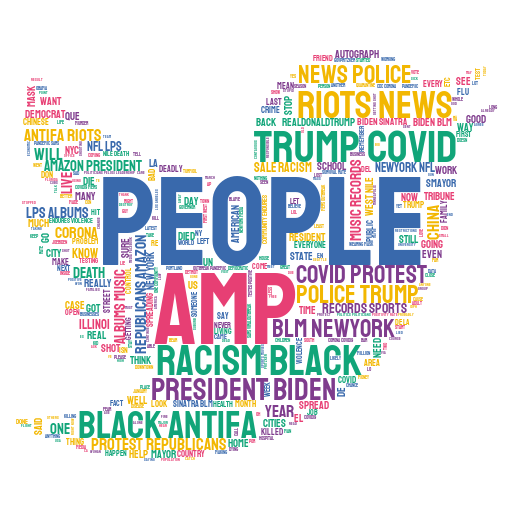

In [62]:
import stylecloud
from IPython.display import Image
import os

filename = 'wordcloud.png'

stylecloud.gen_stylecloud(text=corpus, icon_name='fab fa-twitter', output_name=filename)
Image(filename=filename)

## Exercise 12

Many times the sites we are interested in analyzing data from, do not have apis. Can you generate the word cloud using a more crude method? (Hint: One way is to copy and paste the text from twitter into a string and then pass that into the word cloud.)

In [63]:
text_from_website ='''
Robert Keeler
@rdk33l3r
·
2m
Replying to 
@LordGraydon
& for relief of cold and flu symptoms!
Image
Sydnee McElroy
💖
💜
💙
@sydneemcelroy
·
4h
They won’t close the camps, they won’t protect the kids and they won’t even let us donate the flu vaccines and the time and personnel to give them. If the cruelty isn’t the point, what is?
After child deaths, doctors pressure Border Patrol to let them administer flu vaccines
After three youths died of the flu last year, doctors want to give free vaccinations to migrants — but Border Patrol has so far refused.
latimes.com
Top news
star-telegram.com
Tarrant, Texas getting hit earlier and harder by flu cases
gator-RO
👩🏼‍🚒
@Gator_RoRo
·
Nov 20
Turns out it isn’t the flu.... 
his appendix looks bad... 
I’m ready for this black cloud to get from above us.  
🙏
 
💔
Image
People
Laura M. Browning
💪🏻
💉
please get your flu shot
@ellembee
Writer, editor, Anglophile, moderate prescriptivist. Formerly @TheAVClub
. Board member, ACES: The Society for Editing @copyeditors
. Swears are my own. she/her
View all
AdriannaCox
@AdriNaomiCox
·
1m
I feel like shit I only moves once off this couch today I am sick as fuck and I feel like sleeping also It is night time for me and I am cold and outside isn't even cold I hate catching the flu
Séan Casey
@SleepHussy
·
1h
Please reply with what YOU would like to hear read in my Sexy Flu Voice

'''

stylecloud.gen_stylecloud(text=text_from_website, icon_name='fab fa-twitter', output_name=filename)
#Image(filename=filename)

# Data Cleaning and Analysis

Now we will do some cleaning to the text. We didn't have to before because the wordlcoud package did that for you. However, now since we are doing a more specific analysis, we will have to clean the data.

## Exercise 12

Convert the text we have collected into lowercase